In [1]:
import sys
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-paper')
pt = 1./72.27
fig_width = 239 * pt
aspect_ratio = (1 + 5 ** 0.5) / 2
plt.rcParams["figure.figsize"] = (fig_width, fig_width/aspect_ratio)
plt.rcParams["savefig.bbox"] = "tight"
sns.set_theme(style='whitegrid', context='paper', rc={'axes.facecolor': 'white', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})
# sns.set_theme(style='whitegrid', context='paper', rc={'savefig.transparent': 'true', 'figure.figsize': (fig_width, fig_width/aspect_ratio)})
colors = ["#00a1de", "#009b3a", "#c60c30", "#f9461c", "#532A92", "#e27ea6", "#f9e300", "#62361b"]
anon_name = "IC"

In [3]:
df = pd.read_csv("../outputs/set_of_endpoints_1_meggie_and_emmy_count_from_database_credit.csv")
df.columns = df.columns.str.replace(' ', '')
df = df.sort_values(by='Job_end_time')
user_map = ["Greedy", "Energy", "EFT", "Unknown", "Unknown", "Theta", anon_name, "FASTER", "Mixed", "Runtime"]
df["user_name"] = df["User_id"].apply(lambda uid : user_map[uid])
df = df[df["user_name"] != "Unknown"]
df

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,Direct_carbon_used_in_grams,num_slices,slices,user_name
620,110,62,0,2,12.364473,3.996823e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Greedy
629,119,62,9,2,12.364473,3.996500e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Runtime
621,111,62,1,2,12.364473,3.996822e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Energy
628,118,62,8,2,12.364473,3.996440e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Mixed
622,112,62,2,2,12.364473,3.996107e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,EFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423771,32675,142374,5,0,53756.332593,-1.549956e+09,2.160504e+10,46423.093913,18184.802612,2.160479e+10,88811.469207,256,25157.113253,24038.463911,72,729 730 731 732 733 734 735 736 737 738 739 7...,Theta
1423772,32675,142374,5,0,53756.332593,-1.550010e+09,2.160530e+10,46423.093913,18184.802612,2.160504e+10,88811.469207,256,25156.315054,24037.665711,72,800 801 802 803 804 805 806 807 808 809 810 8...,Theta
1423773,32675,142374,5,0,53756.332593,-1.550064e+09,2.160555e+10,46423.093913,18184.802612,2.160530e+10,88811.469207,256,25155.516855,24036.867512,72,871 872 873 874 875 876 877 878 879 880 881 8...,Theta
1423774,32675,142374,5,0,53756.332593,-1.550117e+09,2.160581e+10,46423.093913,18184.802612,2.160555e+10,88811.469207,256,25154.718655,24036.069313,72,942 943 944 945 946 947 948 949 950 951 952 9...,Theta


In [4]:
df["credits_consumed"] = df.groupby(["user_name"])["Credit_lost"].cumsum()
df["jobs_completed"] = df.groupby(["user_name"])["Credit_lost"].cumcount() / 1000
df["job_end_time_hours"] = df["Job_end_time"] / (60 * 60)
data = df[df["New_credit"] >= 0]
data

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,Direct_carbon_used_in_grams,num_slices,slices,user_name,credits_consumed,jobs_completed,job_end_time_hours
620,110,62,0,2,12.364473,3.996823e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Greedy,1.236447e+01,0.000,1.902227e-01
629,119,62,9,2,12.364473,3.996500e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Runtime,1.236447e+01,0.000,1.902227e-01
621,111,62,1,2,12.364473,3.996822e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Energy,1.236447e+01,0.000,1.902227e-01
628,118,62,8,2,12.364473,3.996440e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Mixed,1.236447e+01,0.000,1.902227e-01
622,112,62,2,2,12.364473,3.996107e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,EFT,1.236447e+01,0.000,1.902227e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355503,13975,35527,5,0,125831.632604,5.573505e+05,4.681604e+09,108667.059875,42566.312285,4.681005e+09,207747.835470,256,59912.598021,57294.105081,167,3799 3800 3801 3802 3803 3804 3805 3806 3807 ...,Theta,3.994426e+08,35.550,1.300446e+06
355504,13975,35527,5,0,125831.632604,4.315189e+05,4.682203e+09,108667.059875,42566.312285,4.681604e+09,207747.835470,256,59916.748054,57298.255114,167,3965 3966 3967 3968 3969 3970 3971 3972 3973 ...,Theta,3.995685e+08,35.551,1.300612e+06
355505,13975,35527,5,0,125831.632604,3.056873e+05,4.682801e+09,108667.059875,42566.312285,4.682203e+09,207747.835470,256,59921.054717,57302.561777,168,4131 4132 4133 4134 4135 4136 4137 4138 4139 ...,Theta,3.996943e+08,35.552,1.300778e+06
355506,13975,35527,5,0,125831.632604,1.798556e+05,4.683400e+09,108667.059875,42566.312285,4.682801e+09,207747.835470,256,59909.938266,57291.445326,167,4298 4299 4300 4301 4302 4303 4304 4305 4306 ...,Theta,3.998201e+08,35.553,1.300944e+06


In [5]:
data

,Job_unique_id,Job_shared_id,User_id,Selected_endpoint,Credit_lost,New_credit,Job_end_time,Energy_used_watt_hours,Number_of_cores_hours_used,Queue_time,Mean_duration_on_machines,Number_of_cores_used,Carbon_used_in_grams,Direct_carbon_used_in_grams,num_slices,slices,user_name,credits_consumed,jobs_completed,job_end_time_hours
620,110,62,0,2,12.364473,3.996823e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Greedy,1.236447e+01,0.000,1.902227e-01
629,119,62,9,2,12.364473,3.996500e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Runtime,1.236447e+01,0.000,1.902227e-01
621,111,62,1,2,12.364473,3.996822e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Energy,1.236447e+01,0.000,1.902227e-01
628,118,62,8,2,12.364473,3.996440e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,Mixed,1.236447e+01,0.000,1.902227e-01
622,112,62,2,2,12.364473,3.996107e+08,6.848016e+02,12.364473,3.043563,0.000000e+00,1844.664646,16,9.169022,4.516124,1,0,EFT,1.236447e+01,0.000,1.902227e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355503,13975,35527,5,0,125831.632604,5.573505e+05,4.681604e+09,108667.059875,42566.312285,4.681005e+09,207747.835470,256,59912.598021,57294.105081,167,3799 3800 3801 3802 3803 3804 3805 3806 3807 ...,Theta,3.994426e+08,35.550,1.300446e+06
355504,13975,35527,5,0,125831.632604,4.315189e+05,4.682203e+09,108667.059875,42566.312285,4.681604e+09,207747.835470,256,59916.748054,57298.255114,167,3965 3966 3967 3968 3969 3970 3971 3972 3973 ...,Theta,3.995685e+08,35.551,1.300612e+06
355505,13975,35527,5,0,125831.632604,3.056873e+05,4.682801e+09,108667.059875,42566.312285,4.682203e+09,207747.835470,256,59921.054717,57302.561777,168,4131 4132 4133 4134 4135 4136 4137 4138 4139 ...,Theta,3.996943e+08,35.552,1.300778e+06
355506,13975,35527,5,0,125831.632604,1.798556e+05,4.683400e+09,108667.059875,42566.312285,4.682801e+09,207747.835470,256,59909.938266,57291.445326,167,4298 4299 4300 4301 4302 4303 4304 4305 4306 ...,Theta,3.998201e+08,35.553,1.300944e+06


/tmp/ipykernel_50474/3433586001.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)
/tmp/ipykernel_50474/3433586001.py:3: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)


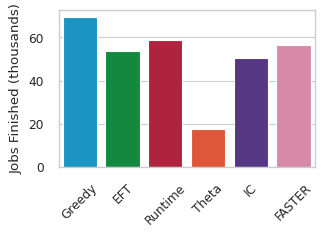

In [6]:
fig, ax = plt.subplots()
# sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)
sns.barplot(data=data, x="user_name", y="jobs_completed", order=['Greedy', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, errorbar=None, ax=ax)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (thousands)")
ax.tick_params(axis='x', labelrotation=45)
plt.savefig("sim_jobs_completed.pdf")
plt.savefig("sim_jobs_completed_talk.png")

/tmp/ipykernel_50474/2388798581.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data=data, x="job_end_time_hours", y="jobs_completed", hue="user_name", hue_order=['Greedy', 'EFT', 'Runtime'], palette=colors, ax=ax)


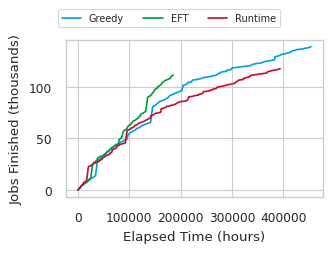

In [7]:
fig, ax = plt.subplots()
# sns.lineplot(data=data, x="job_end_time_hours", y="jobs_completed", hue="user_name", hue_order=['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'], palette=colors, ax=ax)
sns.lineplot(data=data, x="job_end_time_hours", y="jobs_completed", hue="user_name", hue_order=['Greedy', 'EFT', 'Runtime'], palette=colors, ax=ax)

ax.set_xlabel("Elapsed Time (hours)")

ax.set_ylabel("Jobs Finished (thousands)")
sns.move_legend(ax, "lower center", bbox_to_anchor=(.4, 1.05), ncol=4, title=None, fontsize=7)
plt.savefig("sim_jobs_vs_time_eba.pdf")
plt.savefig("sim_jobs_vs_time_eba_talk.png")

/tmp/ipykernel_50474/376610838.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


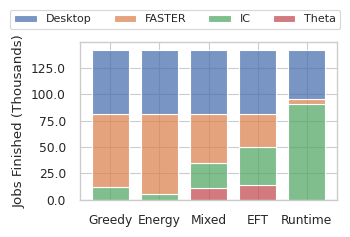

In [8]:
endpoint_map = ["Theta", anon_name, "Desktop", "FASTER"]
df["endpoint_name"] = df["Selected_endpoint"].apply(lambda eid : endpoint_map[eid])
data = df[df["user_name"] != "Theta"]
data = data[data["user_name"] != "FASTER"]
data = data[data["user_name"] != anon_name]
data['user_name'] = pd.Categorical(data['user_name'], ['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'])

fig, ax = plt.subplots()
sns.histplot(data, x="user_name", hue="endpoint_name", multiple="stack", shrink=0.75, ax=ax)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.37, 1.05), ncol=4, title=None, fontsize=8)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (Thousands)")
labels = np.array([int(l.get_text()) for l in ax.get_yticklabels()]) / 1000
ax.set_yticklabels(labels)
plt.savefig("sim_job_distribution_eba.pdf")
plt.savefig("sim_job_distribution_eba_talk.png")

In [9]:
df = pd.read_csv("../outputs/set_of_endpoints_2_meggie_and_emmy_count_from_database_carbon.csv")
df.columns = df.columns.str.replace(' ', '')
df = df.sort_values(by='Job_end_time')
user_map = ["Greedy", "Energy", "EFT", "Unknown", "Unknown", "Theta", anon_name, "FASTER", "Mixed", "Runtime"]
df["user_name"] = df["User_id"].apply(lambda uid : user_map[uid])
df = df[df["user_name"] != "Unknown"]

endpoint_map = ["Theta", anon_name, "Desktop", "FASTER"]
df["endpoint_name"] = df["Selected_endpoint"].apply(lambda eid : endpoint_map[eid])
data = df[df["user_name"] != "Theta"]
data = data[data["user_name"] != "FASTER"]
data = data[data["user_name"] != anon_name]
data['user_name'] = pd.Categorical(data['user_name'], ['Greedy', 'Energy', 'Mixed', 'EFT', 'Runtime', 'Theta', anon_name, 'FASTER'])

fig, ax = plt.subplots()
sns.histplot(data, x="user_name", hue="endpoint_name", multiple="stack", shrink=0.75, ax=ax)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.37, 1.05), ncol=4, title=None, fontsize=8)
ax.set_xlabel(None)
ax.set_ylabel("Jobs Finished (Thousands)")
labels = np.array([int(l.get_text()) for l in ax.get_yticklabels()]) / 1000
ax.set_yticklabels(labels)

for bar in ax.patches:
    bar.set_hatch("//")
    
plt.savefig("sim_job_distribution_cba.pdf")
plt.savefig("sim_job_distribution_cba_talk.png")

FileNotFoundError: [Errno 2] No such file or directory: '../outputs/set_of_endpoints_2_meggie_and_emmy_count_from_database_carbon.csv'